In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv', encoding='utf-8')

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True


In [6]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/%ED%95%9C%EA%B5%AD%EC%96%B4%EB%B6%88%EC%9A%A9%EC%96%B4100.txt", header=None)
stopwords.head()

,0
0,이
1,있
2,하
3,것
4,들


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  75000 non-null  int64  
 1   Unnamed: 0    75000 non-null  int64  
 2   hotelId       75000 non-null  int64  
 3   hotelName     75000 non-null  object 
 4   tripType      75000 non-null  object 
 5   tripTypeText  75000 non-null  object 
 6   reviewDate    75000 non-null  object 
 7   rating        75000 non-null  float64
 8   description   75000 non-null  object 
 9   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 5.2+ MB


In [8]:
len(data['description'])

75000

In [11]:
data.columns

Index(['rating', 'description'], dtype='object')

In [12]:
data = data[['rating', 'description']]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       75000 non-null  float64
 1   description  75000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


In [14]:
data.head()

,rating,description
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3,10.0,가격에 맞게 만족했습니다
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...


In [15]:
data['rating'].value_counts()

rating
10.0    34103
8.0     24283
6.0      8877
4.0      4278
2.0      3459
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

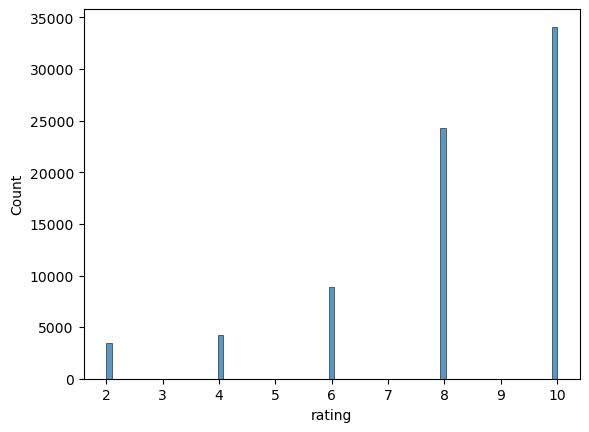

In [16]:
sns.histplot(data['rating'])

In [17]:
for i in list(data.loc[data['rating'] == 6, 'description'])[10:30]:
    print(i)
    print()

투숙객 많아서 발렛도 안됐고 엘베수리까지 하는 통에 타고 내리는데 시간이 진짜 오래 걸렸다  객실에 와인잔이나 디저트 먹을 정도의 디쉬들도 비치가 안되어있어 나이프랑 포크 접시 가져다줄수있냐고했더니 그것도 1인당 5천원씩 청구함 심지어 밤에 추웠음 난방이 중앙난방이라서 그렇다나뭐라나

코로나 영향으로 직원수는 적고 체크인에 관한 진행은 너무 불쾌하고제가 알던 하야트 맞나요 위기 속에 어떠한 대처가 더 빛을 발휘하는데이번 스테이는 프론트의 대처 미숙 및 두 번 다시 얼굴 보기 싫을 정도 였습니다

방이 꽤나 건조합니다휴대용가습기 가져갔었어요입지조건이 최상이고 호텔내 서비스는 글쎄요 짧게 스탠다드룸 묵어 더 한 서비스는 바라지도 않았지만그래도 기본서비스는 해줘야하지 않나요 조식먹을때 앉자마자 커피물어보더니 한 15분뒤에 식사랑 같이 나옴요아 물론 옆테이블에 혼자온 분은 특실에 묵는지모르겠지만 바삐움직여 커피금방주고 요거트종류별로 주고 불편한거 없는지 계속 신경쓰고넘 티나게 차별받는다는 기분 들었네요 작년에 홍콩사모에서 인수됐던데 f&b서비스강화와 투숙인 부대시설이용 가능 부분을 좀 늘리는 전략을 좀 짰음 좋겠습니다 코로나때문인지 조식뷔페가 없어지고 정찬셋팅을 하던데 맛은 좋았어요 특히 메로구이 허나 객장에서 직원들한테 야 네가 좀 해라는 큰 대화는 좀 거슬렸어요아무튼 다음에 숙박은 글쎄입니다

위치나 서비스 등은 늘 그렇듯이 최고의 호텔이지만 서울시내 다른 5성급호텔과 비교해서 시설이나 객실이 너무 낡았고 특히 객실위쪽 벽에 붙어있는 거울이 너무 불편하게 느껴졌습니다 뭔가 옆방하고 뚫려있는듯한 느낌입니다 그냥 주관적인 소견입니다

침대 매트리스가 허리가 너무 아파요

방음이 엉망입니다복도에서 신음소리가 엄청나요

깨끗하고 조용하고 친절합니다 코로나 때문인지  체육관 대여 서비스에 부재가 있습니다 충전기 절도 때문인지 충전기 대여서비스에 부재가 있습니다 수영장 치킨은 신라호텔이 양과 맛에서 더 좋았습니다

5성급인걸로 알고 있는데화장실 하수구 청소를 안해서 물이 세

In [18]:
for i in list(data.loc[data['rating'] == 8, 'description'])[30:60]:
    print(i)
    print()

직원들이 친절합니다 라운지의 음식 종류는 좀 부족한 편입니다 객실은 청결하고 주변 관광지의 접근도 용이합니다

코로나19로 방에만 있어서  제대로 된 평가가 힘듭니다

전반적으로 만족 다만 화장실이 너무 낡았어요세면대에 물이 잘 안내려가요

객실이 건조 합니다가습기 필수엘리베이터가 너무 늦습니다4대 모두 층마다 다멈춤개선필요

저는 19층이었는데 역시 뷰맛집처럼 정말 좋았네요모든 직원분들 친절하셨고  룸서비스 식사도 좋았어요아이스링크 위치를 체크인할때 물어보지 않아서 나중에 건물전체를 돌았는데 사실은 엘리베이터타고 지하 2층에 가야만 됐던거였어요  작은거지만 체크인할때 물어보지않더라도 이야기해주셨으면 했네요 그거 빼고는 객실상태 청결도 만족스러웠습니다

직원들서비스나 위치 한강뷰 실내 수영장 다 너무좋았어요 다만 코로나때문에 조식을 4가지 중 선택해서 먹었는데 맛이아쉬었네요  해외여행도 못가는 요즘 호캉스로 그나마 기분전환했어요

코너룸 뷰와 직원분들의 친절도는 마음에 들었으나 룸 청결도는 별로였어요

만족합니다

뷰도 좋았고 청결했으며 직원들도 친절했습니다다만 옆방이 어린아이들이 딸린 가족이었는데방음은 생각보다 잘 되는것같진않아서 아쉽네요

위치와 전망 모두 아주 좋았으나 주차하는데 30분 걸렸어요 발렛도 다 차서 안된다고 해서 지하 2층에 주차하고 걸어 올라갔네요 주차비도 별도로 만원 받는데 주차 서비스 부분이 너무 아쉽네요

약간 먼지가 많은 느낌이였지만직원분들은 모두 친절하시고그날 마침 첫눈이 내려 침대에 누워 창밖으로 보는 눈이 너무 좋았습니다

욕조가 없어서 아쉽긴 했지만시설 청결도 분위기 직원분들 서비스 조식 전체적으로 다 좋았습니다

한강뷰 너무 좋았고 직원들 친절했으나 룸에 들어가서 청소가 덜되어있었고 침구는 청소되어있어서 그냥 썼는데 이전손님 침대하나 더 들어와있고 유료라고해서 가져가라고했으나 오질않았어요 주말이라 그런가 처리가 늦고 룸서비스 음식은 맛있었어요몇가지빼고는 만족

뷰가 좋아요

주차장에들어서면서 부터 너무힘들었어요 호텔주차하는데

In [19]:
data['isgood'] = data['rating'].apply(lambda x: 1 if x >= 8 else 0)

In [20]:
data

,rating,description,isgood
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1
3,10.0,가격에 맞게 만족했습니다,1
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1
...,...,...,...
74995,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,1
74996,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,1
74997,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,1
74998,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,1


In [21]:
from konlpy.tag import Mecab
mecab = Mecab()

In [22]:
data['description2'] = data['description'].apply(lambda x: mecab.nouns(x))

In [23]:
data

,rating,description,isgood,description2
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1,"[직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]"
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1,"[웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]"
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1,"[서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,..."
3,10.0,가격에 맞게 만족했습니다,1,"[가격, 만족]"
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1,"[처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ..."
...,...,...,...,...
74995,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,1,"[조식, 스탠더드, 하프, 전망, 신청, 박, 가격, 앞, 건물, 전망, 차, 가격..."
74996,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,1,"[객실, 에메, 니티, 필요, 만큼, 분, 거리, 중앙, 시장, 쇼핑]"
74997,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,1,"[배드, 찬바람, 난방기, 시간, 정도]"
74998,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,1,"[위치, 숙소, 짐, 주변, 곳, 먹거리, 곳, 바다, 전망, 굿]"


In [24]:
stopwords = list(stopwords[0])
stopwords

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '왜',
 '뭐',
 '거',
 '해',
 '저',
 '너',
 '건',
 '은',
 '걸',
 '진짜',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓']

In [100]:
stopwords.extend(['들', '나', '된', '과', '은', '가', '에', '호텔', '것', '수'])

In [101]:
stopwords

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '왜',
 '뭐',
 '거',
 '해',
 '저',
 '너',
 '건',
 '은',
 '걸',
 '진짜',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓',
 '들',
 '나',
 '된',
 '과',
 '은',
 '가',
 '에',
 '호텔',
 '것',
 '수']

In [26]:
print(stopwords)
print(type(stopwords))

['이', '있', '하', '것', '들', '그', '되', '수', '왜', '뭐', '거', '해', '저', '너', '건', '은', '걸', '진짜', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']
<class 'list'>


# 단어 빈도분석

In [27]:
word_dist = []
for i in data['description2']:
    for j in i:
        if j not in stopwords:
            word_dist.append(j)
    

print(len(word_dist))
        

870819


In [28]:
from nltk.probability import FreqDist
import koreanize_matplotlib

In [29]:
FreqDist(word_dist)

FreqDist({'호텔': 21908, '방': 13963, '친절': 13472, '만족': 13058, '시설': 11505, '직원': 11089, '조식': 11004, '이용': 10289, '위치': 9001, '객실': 8717, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

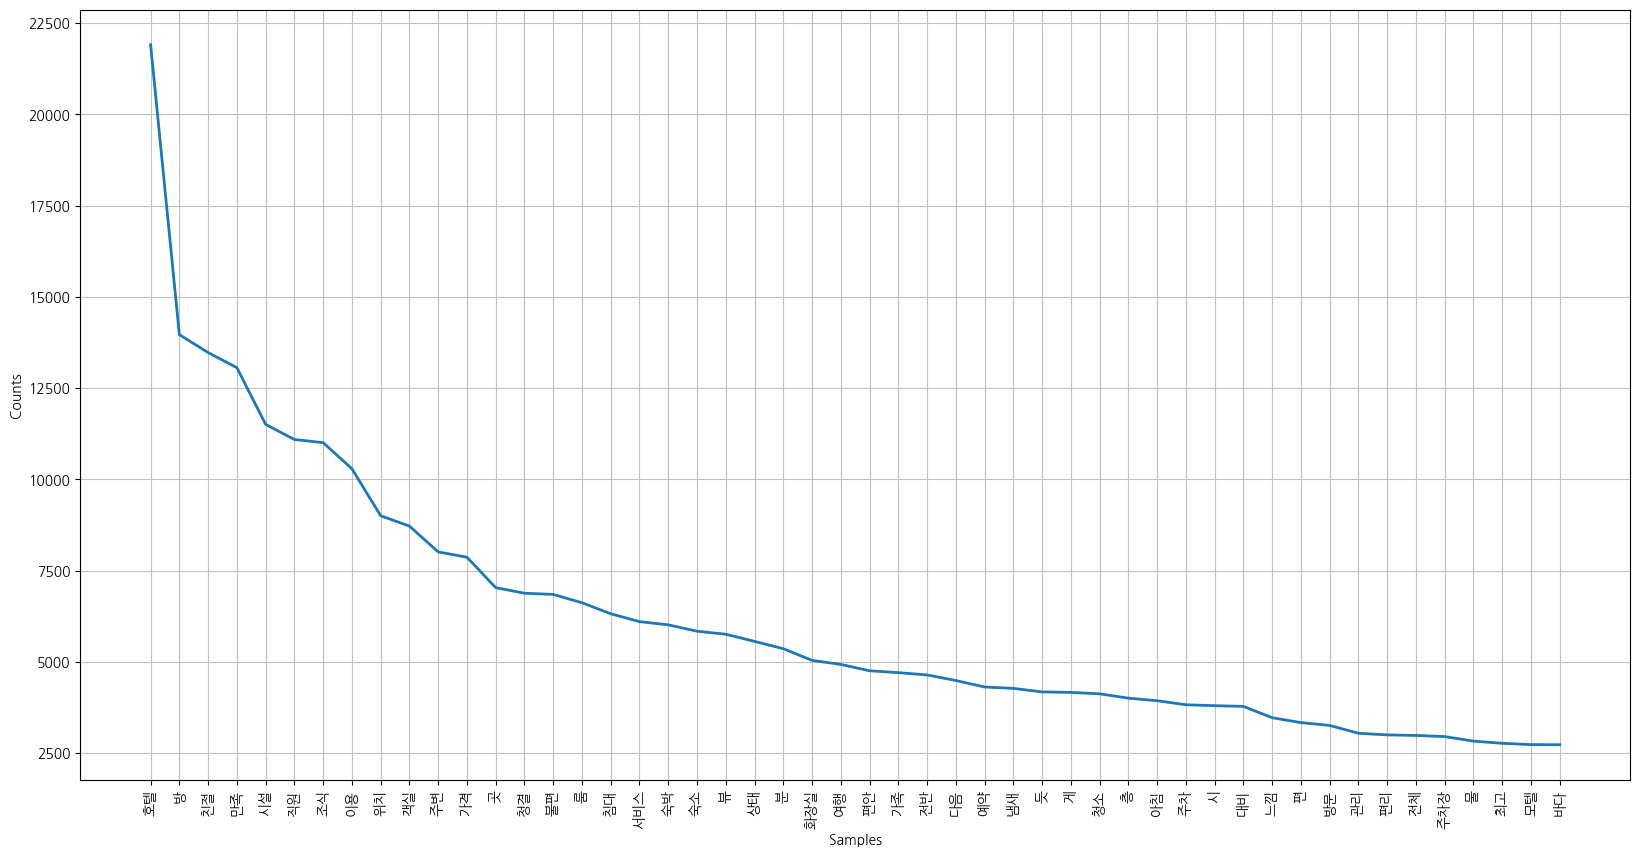

In [30]:
plt.figure(figsize=(20,10))
FreqDist(word_dist).plot(50)

In [31]:
from wordcloud import WordCloud

In [32]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

(-0.5, 399.5, 199.5, -0.5)

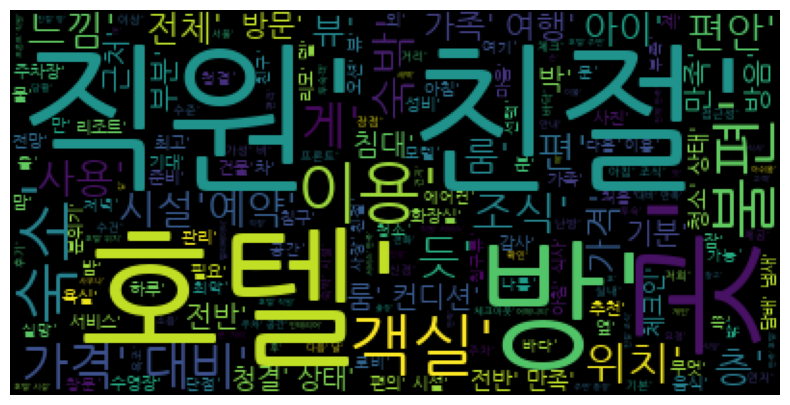

In [33]:
plt.figure(figsize=(10,5))
wc = WordCloud(font_path=font_path).generate(str(word_dist))
plt.imshow(wc)
plt.axis('off')

# 만족한 고객 vs 불만족 고객

In [34]:
good = data[data['isgood'] == 1]['description2']
good

0              [직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]
1            [웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]
2        [서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,...
3                                                 [가격, 만족]
4        [처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ...
                               ...                        
74994                                                   []
74995    [조식, 스탠더드, 하프, 전망, 신청, 박, 가격, 앞, 건물, 전망, 차, 가격...
74996              [객실, 에메, 니티, 필요, 만큼, 분, 거리, 중앙, 시장, 쇼핑]
74997                               [배드, 찬바람, 난방기, 시간, 정도]
74998                [위치, 숙소, 짐, 주변, 곳, 먹거리, 곳, 바다, 전망, 굿]
Name: description2, Length: 58386, dtype: object

In [35]:
bad = data[data['isgood'] == 0]['description2']
bad

15       [가성, 별로, 기대, 실망, 예약, 사전, 메일, 직원, 통화, 객실, 요청, 고...
30       [번, 호텔, 방문, 것, 예전, 호텔, 이번, 실망, 주변, 호텔, 앞, 시위, ...
35                                       [서비스, 절도, 프로, 느낌]
41       [보통, 뷰, 처음, 국내외, 특급, 호텔, 곳, 중, 최악, 당일, 예약, 데이터...
43       [고객, 개, 법, 호텔, 역사, 명불허전, 종업원, 모두, 최상, 서비스, 무엇,...
                               ...                        
74979    [송풍기, 환풍기, 소음, 난방, 공조, 시스템, 작동, 때, 모텔, 차이, 최근,...
74982                                       [비지니스, 호텔, 느낌]
74990    [방, 생각, 수기, 박, 만, 원, 숙소, 조리, 시설, 냉장고, 냉장고, 기능,...
74992    [수건, 비치, 수건, 건, 청소, 상태, 확인, 듯, 주차, 구역, 편의, 시설,...
74999             [주차장, 부족, 데, 주차, 아침, 이동, 전화, 주차, 관리, 신경]
Name: description2, Length: 16614, dtype: object

(-0.5, 399.5, 199.5, -0.5)

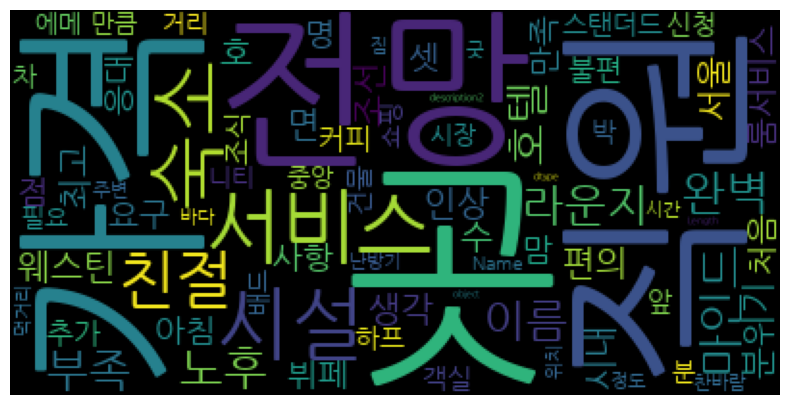

In [36]:
plt.figure(figsize=(10,5))
wc = WordCloud(font_path=font_path).generate(str(good))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

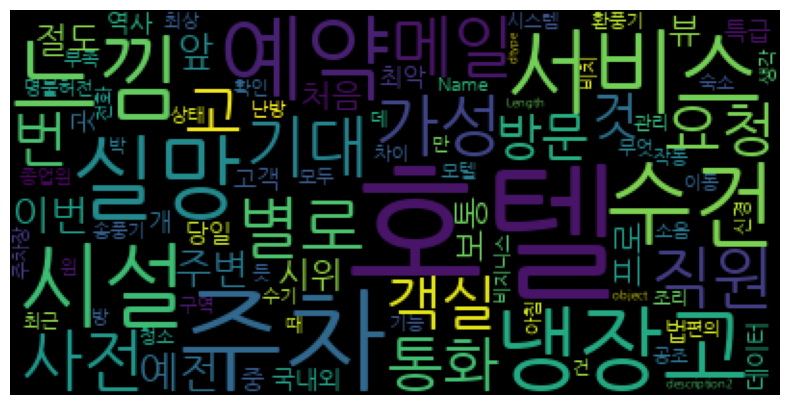

In [37]:
plt.figure(figsize=(10,5))
wc = WordCloud(font_path=font_path).generate(str(bad))
plt.imshow(wc)
plt.axis('off')

In [38]:
data.loc[(data['description'].str.contains("수건")) & (data['isgood'] ==0), 'description']

414      수영장 이용이 횟수가 정해져있구  성수기라 만실라며 청소 상태 수건상태 엉망이구조용...
877      이곳에서 숙박시 가습기와 공기청정기는 필수입니다너무 건조하고 객실 공기가 좋지 못하...
1205     광화문광장에서 집회가 있어서 매우 혼잡하고 시끄러웠다수건 냄새피죤잡냄새 안나서 좋았...
1243     시설이 낡은 것을 감안하고 들어갔는데 욕실 배수가 제대로 되지 않아 불편했어요그리고...
1288                               수건에서 알수없는 냄새가 많이납니다쉰내아님
                               ...                        
74615    가격대비 무난했습니다 같이 온 동료를 커플인줄 알고 스위트로 업그레이드 해주셨습니다...
74722    말이 호텔이니 프론트 보면 모텔 같구요환풍기가 고장인지 화장실에서 하루 종일 담배냄...
74788    202호 객실 사용한 사람입니다³일단 문 열고 들어서는 순간 쾌쾌란 냄새가 나고 내...
74792    바닥이랑 침구가 너무 눅눅하고 더러웠어요 수건에서도 물내났어요이불 덮으면 너무 꿉꿉...
74992    우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이  적음 ...
Name: description, Length: 670, dtype: object

In [39]:
for i in data.loc[(data['description'].str.contains("냉장고")) & (data['isgood'] ==0), 'description'][:50]:
    print(i)
    print()

호텔시설 노후화심함특히 화장실 변기 낡았고변기 물안내려가서 변기 뚜껑열고 고리 잡아올려서 물내림침대및 내부시설 노후됨투숙객한테 주차요금 징수하다니어이상실  냉장고 열고 생수잘못마신덕에  11000원 날림 조식수준 미달

5성급이라고하기엔 시설이 좀 난방 조절이 잘 안되었고 5층인데도 화장실 수압이 낮고수영장도 너무 작고냉장고도  하지만 직원들은 모두 친절했습니다호텔자체 시설면에서  그냥 무난했어요

객실에 비치된 유리컵에 무언가 갈색 찌꺼기가 그대로 남아 있는 걸 컵을 사용하고 나서야 봐서 굉장히 기분이 좋지 않았습니다 침대 베드 근처 콘센트는 금고 뒤에 있는데 커버가 벗겨져 배선이 노출되어 있기 때문에 폰 충전기 등에 사용하기 매우 좋지 않습니다 냉장고에 넣어둔 물은 얼어 있더군요 그 외에도 수전의 코팅이 벗겨져 있다거나 욕조에 머리카락이 있다거나 클로젯에 이전 숙박객의 짐이 그대로 있다거나 하는 여러가지 문제가 있었기 때문에 다시는 이용하지 않을 것 같습니다 다만 위치는 괜찮았네요

옆방 대화소리 심지어 카톡 알림음까지 들릴 정도로 방음 환경 열악함거기에 냉장고 돌아가는 소리 수도관 소리까지 추가되어 잘 수가 없었음

오래된 패브릭 소파가 너무 더럽네요 전날 냉장고에 넣어둔 맥주는 없어지고  카운트에 이야기를 전하니 우리 여사님은 그럴일 할리 없다는데 우선적으로 사과부타 해야 정상이지 가격과 위치는 좋아요

체크인 시간 맞추어 갔으나 준비되어있지 않았고 방 갯수도 잘못되어 있었음한참 기다려서 하나의 방이 준비되고또 한참 기다려서 나머지 방이 준비됨냉장고에 전 투숙객이 놓고간 음식이 남아있었음데스크 직원의 잘못은 아니지만 대처가 매우 미숙했고 미안한 모습을 찾아볼 수 없었음

일회용품칫솔 빗 등이 없는 점을 보다 보기 쉽게 표시했으면 합니다 그리고 전반적으로 오래되었고 냉장고 안이나 컵 샤워 커튼 등이 깨끗이 닦이지 않은 부분들이 조금 보였습니다 방에 베개가 쿠션감이 좋지 않았고 방 온도조절은 되지 않아 무척 건조한 밤을 보냈습니다

전반적으로 가격대비 넓은

# Naive Bayes를 이용한 감성분석

In [40]:
data.head()

,rating,description,isgood,description2
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1,"[직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]"
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1,"[웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]"
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1,"[서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,..."
3,10.0,가격에 맞게 만족했습니다,1,"[가격, 만족]"
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1,"[처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ..."


In [41]:
X = data['description']
y = data['isgood']

In [42]:
y.value_counts()

isgood
1    58386
0    16614
Name: count, dtype: int64

In [43]:
from konlpy.tag import Mecab
mecab = Mecab()

In [44]:
def tokenizer(x):
    token = mecab.morphs(x)
    return token

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [46]:
cv = CountVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=4, ngram_range=(1,3), stop_words=stopwords )
X_cv = cv.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(X_cv, y, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=7)

In [49]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))
test_pred = mnb.predict(X_test)
print("="*40, "test result", "="*40)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      3321
           1       0.93      0.89      0.91     11679

    accuracy                           0.86     15000
   macro avg       0.80      0.83      0.81     15000
weighted avg       0.87      0.86      0.87     15000

======================================== test result ========================================
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      3308
           1       0.93      0.89      0.91     11692

    accuracy                           0.86     15000
   macro avg       0.80      0.83      0.81     15000
weighted avg       0.88      0.86      0.87     15000



# TfidfVectorizer

In [57]:
tfidf_cv = TfidfVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=4, ngram_range=(1,3), stop_words=stopwords )
X_tfidf = tfidf_cv.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [59]:
X_train, X_valid, y_train, y_valid = train_test_split(X_tfidf, y, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=7)

In [60]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))
test_pred = mnb.predict(X_test)
print("="*40, "test result", "="*40)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.32      0.48      3321
           1       0.84      0.99      0.91     11679

    accuracy                           0.84     15000
   macro avg       0.86      0.66      0.69     15000
weighted avg       0.85      0.84      0.81     15000

======================================== test result ========================================
              precision    recall  f1-score   support

           0       0.87      0.34      0.48      3308
           1       0.84      0.99      0.91     11692

    accuracy                           0.84     15000
   macro avg       0.85      0.66      0.70     15000
weighted avg       0.85      0.84      0.81     15000



# SMOTE 로 데이터 증폭 후 분석

In [55]:
# !pip install imbalanced-learn

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
y_train.value_counts()

isgood
1    35015
0     9985
Name: count, dtype: int64

In [63]:
smt = SMOTE(random_state=7)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [64]:
y_train_smt.value_counts()

isgood
1    35015
0    35015
Name: count, dtype: int64

In [65]:
X_train_smt

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5747157 stored elements and shape (70030, 147743)>

In [66]:
mnb = MultinomialNB()
mnb.fit(X_train_smt, y_train_smt)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))
test_pred = mnb.predict(X_test)
print("="*40, "test result", "="*40)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.62      0.84      0.72      3321
           1       0.95      0.86      0.90     11679

    accuracy                           0.85     15000
   macro avg       0.79      0.85      0.81     15000
weighted avg       0.88      0.85      0.86     15000

======================================== test result ========================================
              precision    recall  f1-score   support

           0       0.62      0.84      0.72      3308
           1       0.95      0.86      0.90     11692

    accuracy                           0.85     15000
   macro avg       0.79      0.85      0.81     15000
weighted avg       0.88      0.85      0.86     15000

